## Otimização com algoritmo de subida da colina

Considere a função abaixo:
```code
g(x) = (2^(-2 ((x−0.1)/0.9)^2)) ((sin(5πx))^6)
```

e sua versão em Python:

In [1]:
from random import random
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    part1 = 2**(-2 * (((x - 0.1) / 0.9) ** 2))
    part2 = math.sin(5*math.pi*x)**6
    
    return part1 * part2

In [3]:
x = np.linspace(start=0.0, stop=1.0, num=1000)
y = np.empty([x.shape[0]])

for i in range(len(x)):
    result = f(x[i])
    y[i] = result

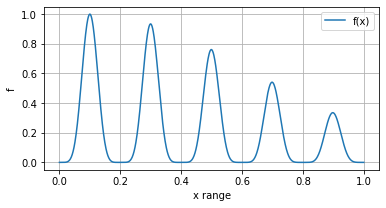

In [60]:
def plot(dot: list = None):
    plt.figure(figsize=[6,3])
    plt.plot(x, y, label='f(x)')
    
    if dot:
        plt.plot(dot[0], dot[1],'yo')
        
    plt.ylabel('f')
    plt.xlabel('x range')
    plt.legend()
    plt.grid(True)
    plt.show()
    
plot()

![title](hca.png)

In [61]:
import time 

def N(x):
    r = x * 1.01
    l = x * 0.99
    
    if f(l) > f(x):
        return l
    elif f(l) < f(x):
        return r
    else: 
        return None

def hill_climbing():
    i = random()
    
    while True:
        s = N(i)
        time.sleep(1)
        plot([i, f(i)])
        if f(s) > f(i):
            i = s
            continue
        
        break
            
    return [i, f(i)]


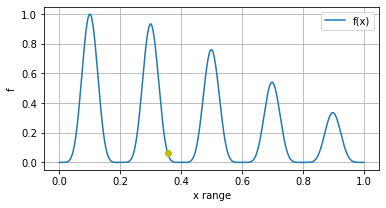

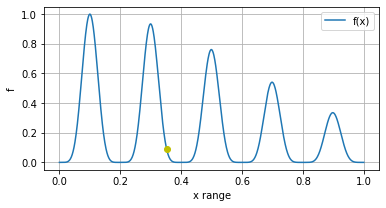

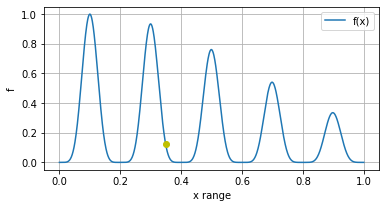

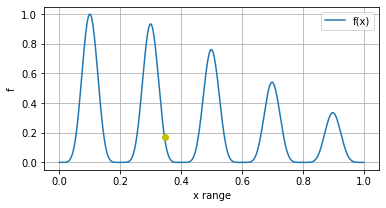

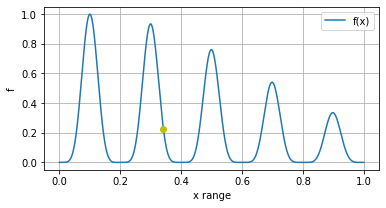

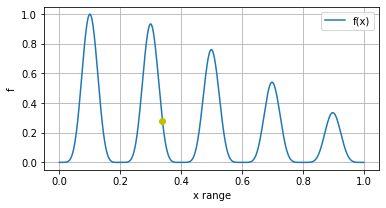

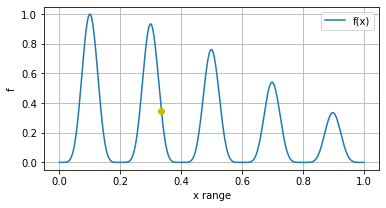

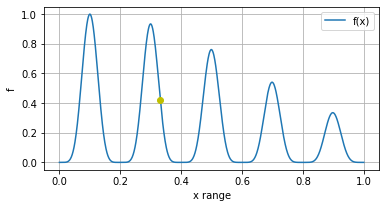

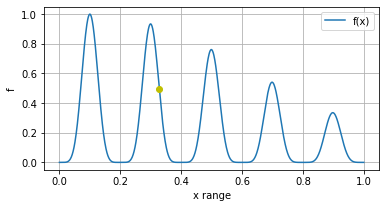

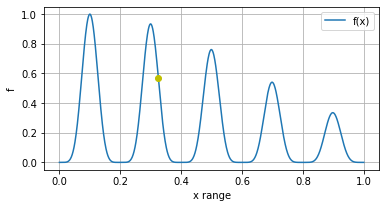

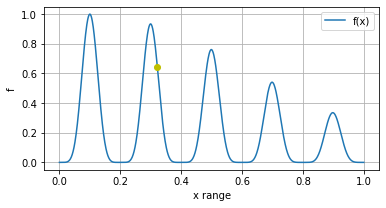

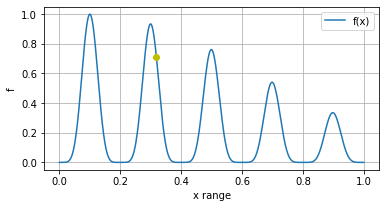

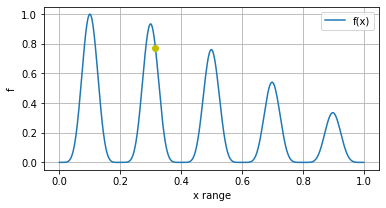

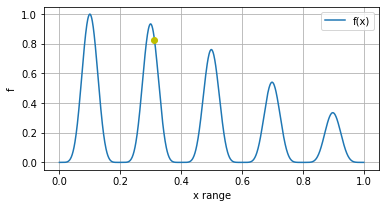

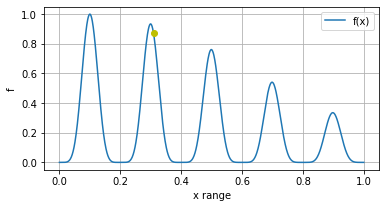

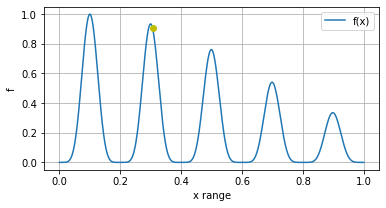

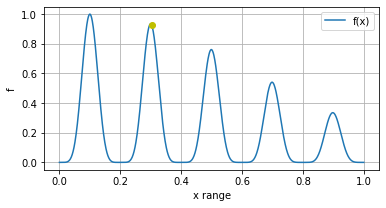

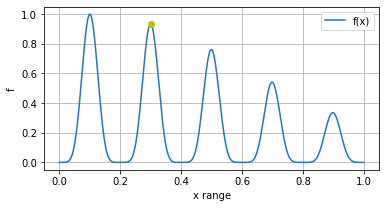

[0.3000166582632256, 0.9338209226655081]

In [62]:
hill_climbing()

# Optimization with Stochastic Hill Climbing

```
procedimento [x] = stochastic-hill-climbing(max_it, g)
    inicializar x
    avaliar(x)
    t ← 1
    enquanto t ≤ max_it & avaliar(x) ! = g faça
        x’ ← perturbar(x)
        avaliar(x’)
        
        se aleatorio[0,1) < (1/(1+exp[(avaliar(x)-avaliar(x’))/T]))
            então x ← x’
        fim-se
        
        t ← t + 1
    fim-enquanto
fim-procedimento
```

T é um parâmetro de controle do decaimento
da função exponencial, quanto maior for o valor de T, maior a chance de x' ser atualizado.

In [64]:
def stochastic_hill_climbing(max_it: int, g: int):
    pass
    # (1/(1+exp((avaliar(x) - avaliar(xl))/T))):